## Question 1

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

### Import csv into dataframe

In [2]:
df = pd.read_csv("spenddata.csv")
df.head()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158
0,1,1,2.0,NaN,1,5,1,57,34,1,...,1,0,0,0,1,0,0,0,5.0,NaN
1,2,1,2.0,NaN,1,4,1,57,34,2,...,0,0,0,0,0,0,1,0,NaN,NaN
2,3,1,2.0,NaN,1,5,1,57,42,2,...,0,0,0,0,0,0,0,0,3.0,NaN
3,4,1,2.0,NaN,1,6,1,57,34,2,...,0,0,0,0,1,0,1,0,5.0,NaN
4,5,1,2.0,NaN,1,8,1,22,1,1,...,0,0,0,0,0,0,0,0,5.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18379 entries, 0 to 18378
Columns: 301 entries, Unnamed: 0 to t.158
dtypes: float64(134), int64(165), object(2)
memory usage: 42.2+ MB


### Creation of Dummy Variable + Remove Columns not Used
The dummy variables are used to replace the text variables, such that they can be used for computation in the subsequent steps. Columns that will not be used for computation will also be removed. These columns do not add any value in the clustering algorithm. 

In [4]:
def dummy_var9(value):
    if value == "Mono":
        return 1
    elif value == "Multi":
        return 2
    else:
        return 0

df["var9_int"] = df["var9"].apply(dummy_var9)

## remove columns that do not add value
df.drop(columns = ["var9", "month", "Unnamed: 0", "year", "respondent.id"], 
        inplace = True)

df.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int
0,2.0,NaN,1,5,1,57,34,1,NaN,1,...,0,0,0,1,0,0,0,5.0,NaN,1
1,2.0,NaN,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,NaN,NaN,1
2,2.0,NaN,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,NaN,2
3,2.0,NaN,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,NaN,1
4,2.0,NaN,1,8,1,22,1,1,NaN,1,...,0,0,0,0,0,0,0,5.0,NaN,2


### Replacing NaN values with 0
This is such that it can be used to calculate the standardised values. In this case, we assume that the columns are not binary. Thus, changing the NaN values to 0 will not "change" the value of the data. 

In [5]:
# replacing all NaN values with 0
df.fillna(0, inplace = True)
df.head()

,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.7,...,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284,t.158,var9_int
0,2.0,0.0,1,5,1,57,34,1,0.0,1,...,0,0,0,1,0,0,0,5.0,0.0,1
1,2.0,0.0,1,4,1,57,34,2,3.0,1,...,0,0,0,0,0,1,0,0.0,0.0,1
2,2.0,0.0,1,5,1,57,42,2,1.0,1,...,0,0,0,0,0,0,0,3.0,0.0,2
3,2.0,0.0,1,6,1,57,34,2,4.0,1,...,0,0,0,1,0,1,0,5.0,0.0,1
4,2.0,0.0,1,8,1,22,1,1,0.0,1,...,0,0,0,0,0,0,0,5.0,0.0,2


### Transformation Process
Transformation is done for variables that are highly skewed. Values that are lesser than -1 or greater than 1 will be considered as highly skewed. 

In [6]:
skewness = df.skew()

var_to_transform = []

for name, value in skewness.iteritems():
    if value > 1 or value < -1:
        var_to_transform.append(name)
print(var_to_transform)

['var6', 'b.7', 'b.9', 'b.10', 'b.11', 'b.13', 'b.14', 'b.15', 'b.16', 'b.17', 'b.18', 'b.20', 'b.21', 'b.22', 'pov6', 'b.23', 'b.24', 'b.25', 'b.26', 'b.27', 'b.28', 'c.29', 'c.30', 'c.31', 'c.32', 'c.34', 'c.35', 'c.36', 'c.37', 'c.39', 'c.40', 'c.41', 'c.42', 'c.43', 'c.44', 'c.45', 'c.46', 'c.47', 'c.48', 'c.49', 'c.50', 'c.51', 'c.52', 'c.53', 'c.54', 'c.55', 'c.56', 'c.57', 'c.58', 'c.59', 'c.60', 'c.61', 'c.62', 'b.63', 'c.65', 'c.66', 'c.67', 'c.68', 'c.69', 'c.70', 'c.71', 'c.72', 'c.73', 'c.74', 'c.75', 'c.76', 'c.77', 'c.78', 'c.79', 'c.80', 'c.81', 'c.82', 'c.83', 'c.84', 'c.85', 'c.86', 'c.87', 'c.88', 'c.89', 'c.90', 'c.91', 'c.92', 'f.105', 'f.106', 'f.107', 'f.108', 'f.109', 'f.110', 'f.111', 'f.112', 'f.113', 'f.114', 'f.115', 'f.116', 'f.117', 'f.118', 'f.119', 'f.120', 'f.121', 'f.122', 'f.123', 'a.124', 'var3', 'var4', 'c.125', 'c.126', 'c.127', 'pp.128', 'pp.129', 'pp.130', 'pp.131', 'pp.132', 'pp.133', 'pp.134', 'c.135', 'c.136', 'c.137', 'c.138', 'c.139', 'c.140'

In [7]:
for variable in var_to_transform:
    new_name = "log_" + variable
    df[new_name] = np.log(df[variable] + 1)
    
# removed non-transformed columns
df.drop(columns = var_to_transform, inplace = True)
df.head()

,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.8,b.12,...,log_c.273,log_c.274,log_c.275,log_c.277,log_c.278,log_c.279,log_c.280,log_c.281,log_c.282,log_c.283
0,2.0,1,5,1,57,34,1,0.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.000000,0.0
1,2.0,1,4,1,57,34,2,3.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0
2,2.0,1,5,1,57,42,2,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2.0,1,6,1,57,34,2,4.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.0
4,2.0,1,8,1,22,1,1,0.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


### Dataset Standardisation
Data standardisation is peorformed such that all the values will be on the same scale. 

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
df_scaled = scaler.transform(df)
df_scaled

array([[ 0.41797295,  0.        , -0.54669362, ..., -0.19972256,
        -0.2750927 , -0.13416986],
       [ 0.41797295,  0.        , -0.95477104, ..., -0.19972256,
         3.6351383 , -0.13416986],
       [ 0.41797295,  0.        , -0.54669362, ..., -0.19972256,
        -0.2750927 , -0.13416986],
       ...,
       [-1.39358816,  0.        , -0.54669362, ..., -0.19972256,
        -0.2750927 , -0.13416986],
       [-1.39358816,  0.        , -0.95477104, ..., -0.19972256,
         3.6351383 , -0.13416986],
       [ 1.32375351,  0.        , -0.13861621, ..., -0.19972256,
        -0.2750927 , -0.13416986]])

In [10]:
df_prepared = pd.DataFrame(df_scaled, columns = df.columns)
df_prepared.head()

,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.8,b.12,...,log_c.273,log_c.274,log_c.275,log_c.277,log_c.278,log_c.279,log_c.280,log_c.281,log_c.282,log_c.283
0,0.417973,0.0,-0.546694,0.0,0.008724,0.826032,-1.129119,-0.879448,-0.483734,0.757060,...,-0.552312,-0.368372,-0.161113,-0.330312,-0.223849,-0.276121,2.454712,-0.199723,-0.275093,-0.13417
1,0.417973,0.0,-0.954771,0.0,0.008724,0.826032,0.885646,1.237100,-0.483734,0.757060,...,-0.552312,-0.368372,-0.161113,-0.330312,-0.223849,-0.276121,-0.407380,-0.199723,3.635138,-0.13417
2,0.417973,0.0,-0.546694,0.0,0.008724,1.578506,0.885646,-0.173932,-0.483734,-1.320899,...,-0.552312,-0.368372,-0.161113,-0.330312,-0.223849,-0.276121,-0.407380,-0.199723,-0.275093,-0.13417
3,0.417973,0.0,-0.138616,0.0,0.008724,0.826032,0.885646,1.942616,-0.483734,0.757060,...,-0.552312,-0.368372,-0.161113,-0.330312,-0.223849,-0.276121,2.454712,-0.199723,3.635138,-0.13417
4,0.417973,0.0,0.677539,0.0,-0.961049,-2.277924,-1.129119,-0.879448,0.239133,-1.320899,...,-0.552312,-0.368372,-0.161113,-0.330312,-0.223849,-0.276121,-0.407380,-0.199723,-0.275093,-0.13417


### KMeans Method
The SSE is calculated and the value of K will be defined by the Elbow Method. 

In [11]:
sse = []

for i in range (1, 10):
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(df_prepared)
    sse.append(model.inertia_)

sse

[5366668.000000001,
 5063219.498710746,
 4832642.066105606,
 4700390.77190287,
 4590694.495576666,
 4518524.424036916,
 4452508.960699122,
 4384778.9260005765,
 4314006.047367832]

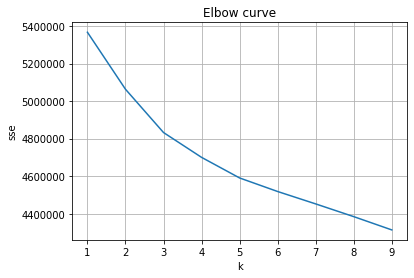

In [12]:
k = (range(1, 10))
plt.plot(k, sse)
plt.title("Elbow curve")
plt.xlabel("k")
plt.ylabel("sse")
plt.grid(True)
plt.show()

### Performing Clustering
Based on the Elbow curve that is plotted, K can be either 3 or 5. However, the change in SSE when K = 3 is slightly larger, thus the K = 3 will be used in the clustering algorithm. 

In [13]:
model = KMeans(n_clusters = 3, random_state = 0)
model.fit(df_prepared)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [14]:
print("SSE:", round(model.inertia_, 2))
print("Number of Iterations:", model.n_iter_)

SSE: 4832642.07
Number of Iterations: 19


In [15]:
df["cluster"] = model.labels_
df["cluster"].value_counts()

1    9063
0    6817
2    2499
Name: cluster, dtype: int64

In [16]:
cluster_mean = pd.DataFrame(model.cluster_centers_, columns = df_prepared.columns)
cluster_mean

,var8,a.1,a.2,a.3,a.4,var5,b.5,b.6,b.8,b.12,...,log_c.273,log_c.274,log_c.275,log_c.277,log_c.278,log_c.279,log_c.280,log_c.281,log_c.282,log_c.283
0,-0.213164,0.0,0.119627,0.0,0.036770,-0.091919,0.369616,0.035539,-0.040173,0.068472,...,-0.388016,-0.328574,-0.076107,-0.277116,-0.168797,-0.151476,-0.230624,-0.176045,0.078818,-0.077406
1,0.188604,0.0,-0.081252,0.0,0.027805,0.016175,-0.132074,0.044036,0.060869,0.054778,...,0.284330,0.221834,0.037732,0.182816,0.106906,0.108791,0.158217,0.134060,0.007076,-0.086450
2,-0.102516,0.0,-0.031657,0.0,-0.201141,0.192082,-0.529285,-0.256651,-0.111164,-0.385443,...,0.027299,0.091798,0.070773,0.092933,0.072749,0.018664,0.055319,-0.005957,-0.240669,0.524681


### Visualising the Results

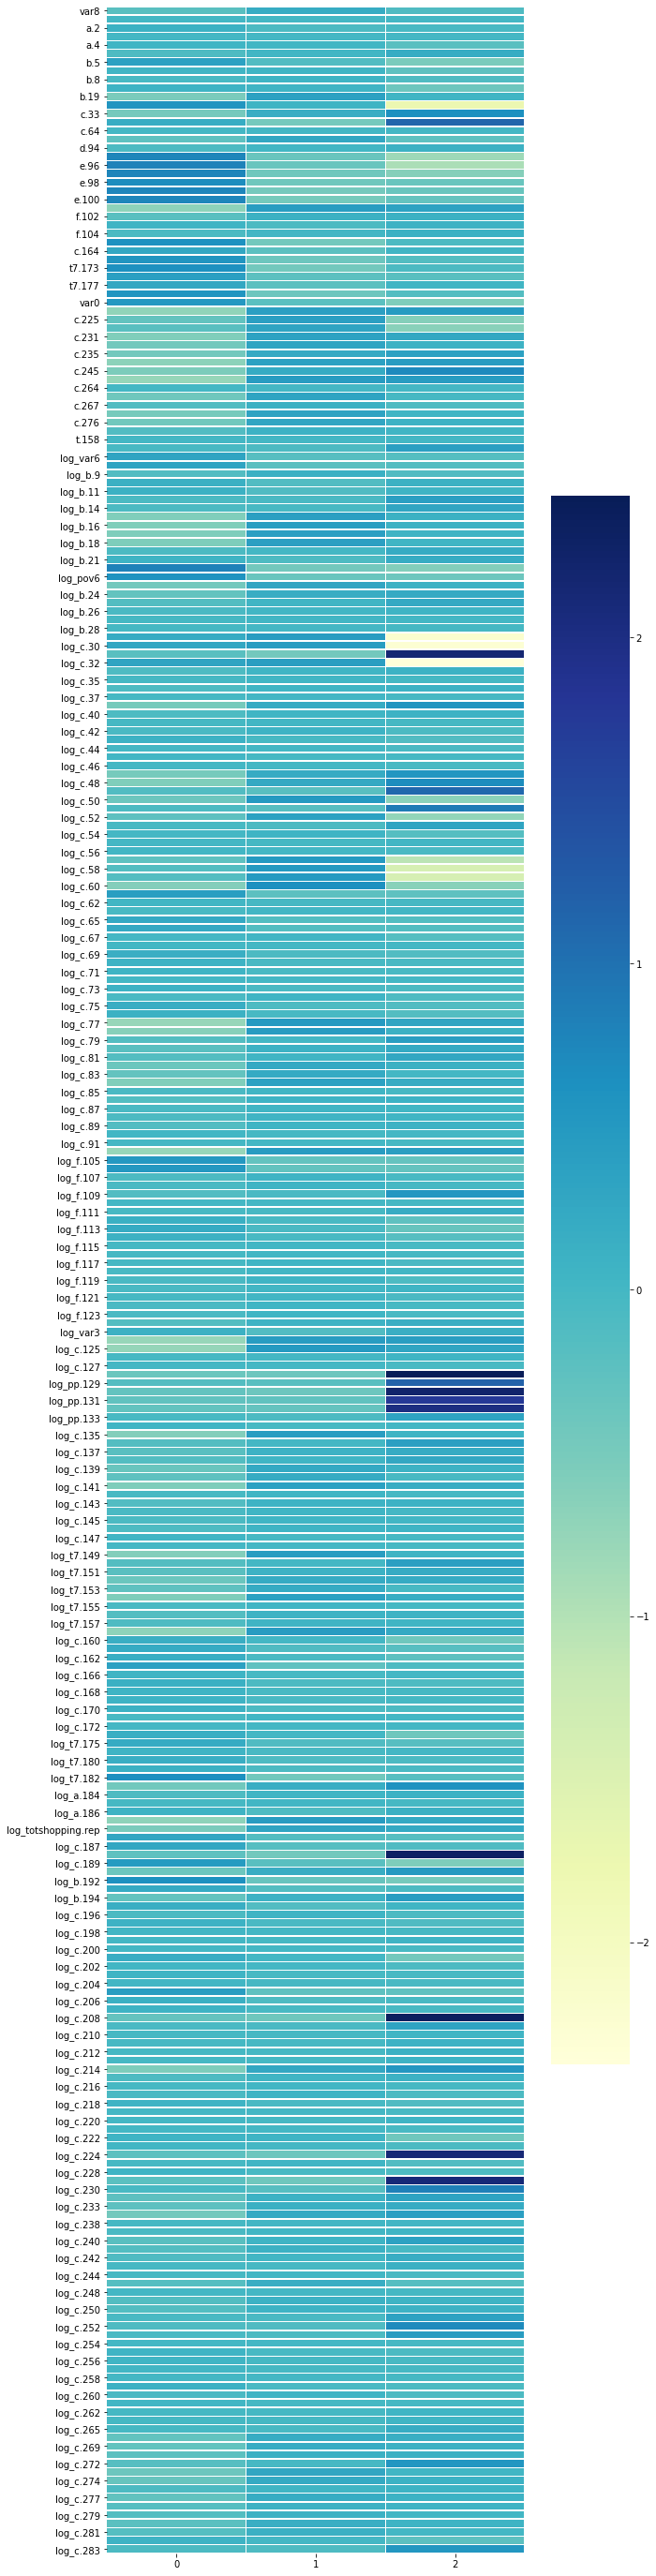

In [17]:
import seaborn as sns
plt.figure(figsize = (10,50))
sns.heatmap(cluster_mean.T, linewidths = .5, cmap = "YlGnBu")

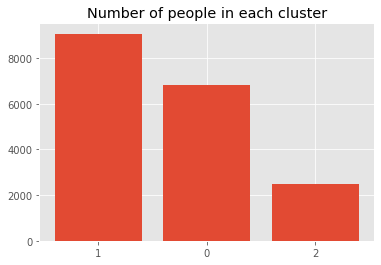

In [19]:
clusters = df["cluster"].value_counts()

cluster_index = []
cluster_value = []

for index, value in clusters.iteritems():
    cluster_index.append(str(index))
    cluster_value.append(value)
    
plt.bar(cluster_index, cluster_value)
plt.style.use("ggplot")
plt.title("Number of people in each cluster")
plt.show()

Based on the results, we see that:
- Cluster 0: Generally light colours, which might indicate that they are the lower spenders
- Cluster 1: Colours are in between clusters 0 and 2, thus indicating that they belong to mid range
- Cluster 2: Colours are darker, thus indicating that they are the higher spenders

Most respondents come from cluster 1, followed by cluster 0 and 2. 